In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("train.csv")
test =  pd.read_csv("test.csv")

In [4]:
train.shape,test.shape

((913000, 4), (45000, 4))

In [5]:
display(train.head())
display(test.head())

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [7]:
import datetime as dt
train['date'] = pd.to_datetime(train['date'])

In [8]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month

In [9]:
train.head()

,date,store,item,sales,year,month
0,2013-01-01,1,1,13,2013,1
1,2013-01-02,1,1,11,2013,1
2,2013-01-03,1,1,14,2013,1
3,2013-01-04,1,1,13,2013,1
4,2013-01-05,1,1,10,2013,1


In [10]:
for i in train.columns:
    print(i)
    print(train[i].value_counts())
    print("*"*50)

date
2013-01-01    500
2016-05-11    500
2016-05-09    500
2016-05-08    500
2016-05-07    500
             ... 
2014-08-29    500
2014-08-28    500
2014-08-27    500
2014-08-26    500
2017-12-31    500
Name: date, Length: 1826, dtype: int64
**************************************************
store
1     91300
2     91300
3     91300
4     91300
5     91300
6     91300
7     91300
8     91300
9     91300
10    91300
Name: store, dtype: int64
**************************************************
item
1     18260
38    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
39    18260
2     18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
27    18260
26    18260
25    18260
24    18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    1

In [11]:
sales_year = pd.DataFrame(train.groupby('year')['sales'].sum()).reset_index()
sales_year.head()

,year,sales
0,2013,7941243
1,2014,9135482
2,2015,9536887
3,2016,10357160
4,2017,10733740


<Axes: xlabel='year', ylabel='sales'>

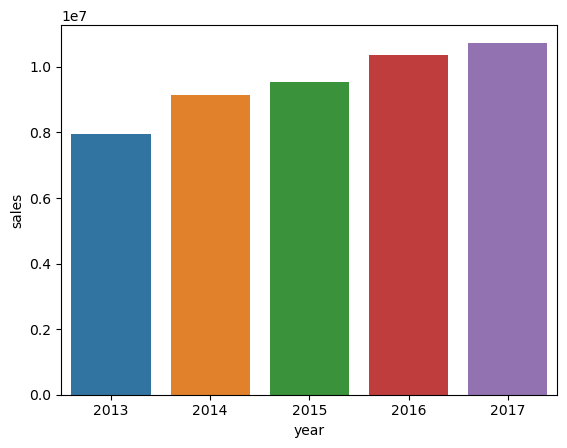

In [12]:
sns.barplot(data=sales_year,x='year',y='sales')

<Axes: xlabel='year', ylabel='sales'>

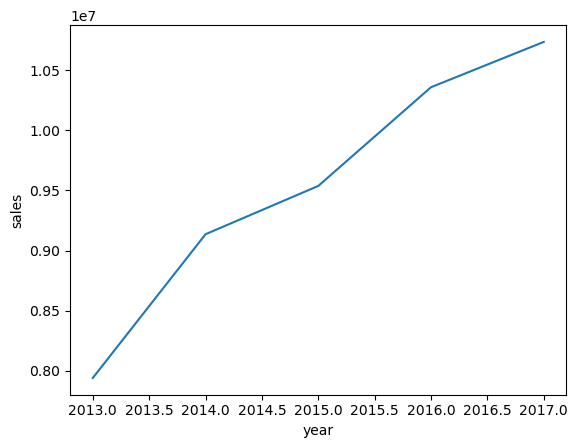

In [13]:
sns.lineplot(data=sales_year,x='year',y='sales')

In [14]:
print('starting_date',train['date'].min())
print('ending_date',train['date'].max())

starting_date 2013-01-01 00:00:00
ending_date 2017-12-31 00:00:00


In [15]:
print('starting_date',test['date'].min())
print('ending_date',test['date'].max())

starting_date 2018-01-01
ending_date 2018-03-31


In [16]:
train.head()

,date,store,item,sales,year,month
0,2013-01-01,1,1,13,2013,1
1,2013-01-02,1,1,11,2013,1
2,2013-01-03,1,1,14,2013,1
3,2013-01-04,1,1,13,2013,1
4,2013-01-05,1,1,10,2013,1


In [17]:
df = train.drop(columns=['store','item','year','month'])

In [18]:
df=df.set_index('date')

In [19]:
print(df.shape)
display(df.head())

(913000, 1)


,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10


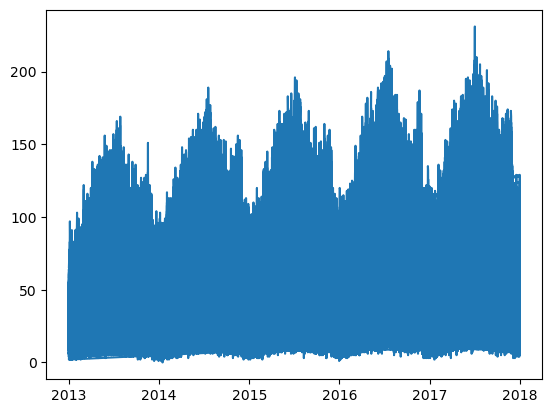

In [20]:
plt.plot(df)

* **Checking for stationarity-->
* statsmodels is a powerful library for statistical modeling and hypothesis testing in Python. The adfuller function is used to perform the Augmented Dickey-Fuller test, which is a unit root test used to check for the presence of a unit root in a univariate time series.

* A unit root is a characteristic of a time series where the process is not stable and has a stochastic trend, meaning it is non-stationary. The Augmented Dickey-Fuller test helps in determining whether a time series is stationary or not, which is essential in many time series analysis and forecasting techniques.

In [95]:
new_df = df[df.index>'2017-01-03']
len(new_df)

181000

In [22]:
from statsmodels.tsa.stattools import adfuller
sales = adfuller(new_df['sales'])

In [23]:
print('ADF:-->',sales[0])
print('P-value:-->',sales[1])
print('Num of lags:-->',sales[2])
print('No of observation used for ADF regression and critical value calculation:-->',sales[3])

ADF:--> -16.750791906342833
P-value:--> 1.334466240582691e-29
Num of lags:--> 79
No of observation used for ADF regression and critical value calculation:--> 180920


In [24]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

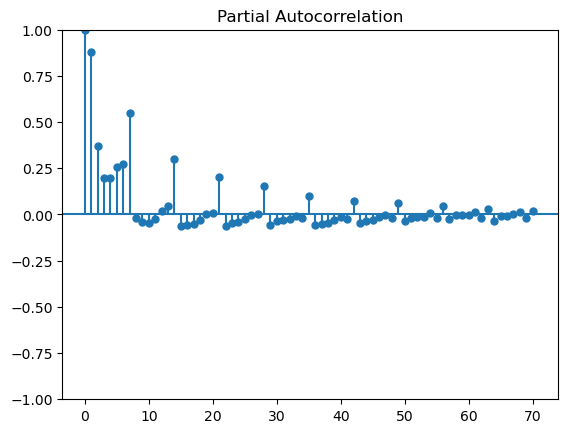

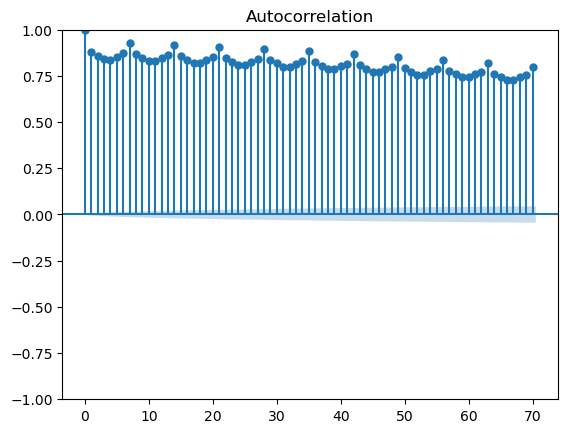

In [25]:
pacf = plot_pacf(new_df['sales'],lags=70)
acf = plot_acf(new_df['sales'],lags=70)

In [26]:
x = new_df.values

In [27]:
train_data = x[:len(x)-30]
test_data = x[len(x)-30:]

In [28]:
model = AutoReg(train_data,lags=40).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:               180970
Model:                    AutoReg(40)   Log Likelihood             -661486.518
Method:               Conditional MLE   S.D. of innovations              9.366
Date:                Sat, 05 Aug 2023   AIC                        1323057.036
Time:                        05:32:29   BIC                        1323481.483
Sample:                            40   HQIC                       1323182.506
                               180970                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6518      0.050     13.108      0.000       0.554       0.749
y.L1           0.1837      0.002     78.152      0.000       0.179       0.188
y.L2           0.1191      0.002     49.840      0.0

In [29]:
len(train_data),len(x)-1

(180970, 180999)

In [30]:
pred = model.predict(start=len(train_data),end=len(x)-1,dynamic=False)

In [31]:
len(pred)

30

In [32]:
test_data.flatten()

array([49, 75, 54, 68, 60, 66, 67, 69, 69, 54, 67, 67, 72, 72, 52, 86, 53,
       54, 51, 63, 75, 70, 76, 51, 41, 63, 59, 74, 62, 82])

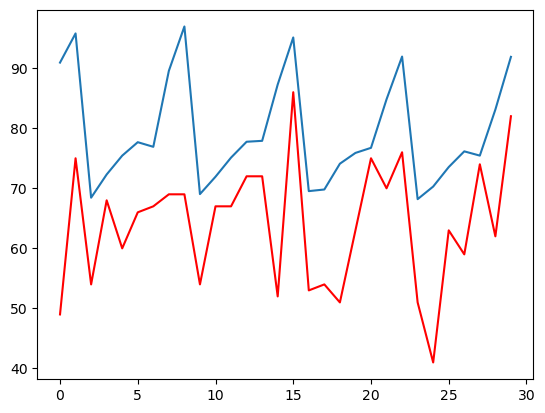

In [33]:
plt.plot(pred)
plt.plot(test_data,color='red')

In [34]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_data,pred))

In [35]:
print(rmse)

17.89765673754997


In [36]:
test_data.flatten().mean()

64.03333333333333

In [37]:
test.shape

(45000, 4)

In [38]:
submit = pd.read_csv('sample_submission.csv')
submit.shape

(45000, 2)

In [39]:
submit.head()

,id,sales
0,0,52
1,1,52
2,2,52
3,3,52
4,4,52


In [40]:
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [41]:
train.tail()

,date,store,item,sales,year,month
912995,2017-12-27,10,50,63,2017,12
912996,2017-12-28,10,50,59,2017,12
912997,2017-12-29,10,50,74,2017,12
912998,2017-12-30,10,50,62,2017,12
912999,2017-12-31,10,50,82,2017,12


In [42]:
pred_test = model.predict(start=len(x),end=len(x)+44999,dynamic=False)

In [49]:
pred_test = pd.DataFrame(pred_test)

In [53]:
start = len(x)
end = len(x)+44999
pred_test.index=test.index[0:45000]

<Axes: >

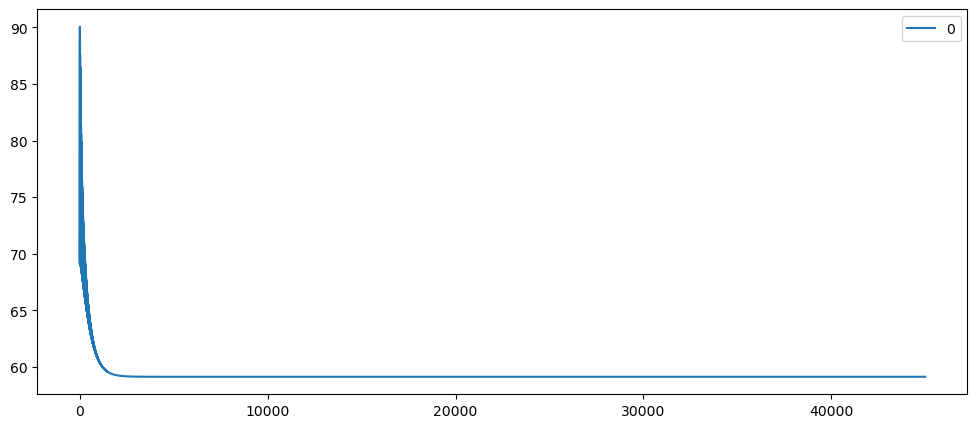

In [55]:
pred_test.plot(figsize=(12,5),legend=True)

In [67]:
pred_test.columns

Int64Index([0], dtype='int64')

In [71]:
submit['sales']=pred_test[[0]]

In [72]:
submit

,id,sales
0,0,69.356867
1,1,69.146571
2,2,72.384511
3,3,74.655412
4,4,74.542746
...,...,...
44995,44995,59.126690
44996,44996,59.126690
44997,44997,59.126690
44998,44998,59.126690


In [73]:
submit.to_csv('submission.csv')

# Using ARIMA model

In [76]:
from pmdarima import auto_arima

In [97]:
new_df = new_df[new_df.index>'2017-07-01']

In [98]:
new_df.head()

,sales
date,
2017-07-02,38
2017-07-03,18
2017-07-04,23
2017-07-05,23
2017-07-06,31


In [99]:
stepwise=auto_arima(new_df['sales'],trace=True)
stepwise.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=734223.406, Time=48.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=769534.007, Time=2.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=752043.568, Time=2.71 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=735459.262, Time=13.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=769532.007, Time=1.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=734378.141, Time=26.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=734282.160, Time=39.74 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=727414.870, Time=86.92 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=732726.090, Time=40.04 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=729938.655, Time=83.54 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=713271.551, Time=169.37 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=732434.901, Time=110.32 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=723172.379, Time=214.24 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=231.81 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                91500
Model:               SARIMAX(3, 1, 5)   Log Likelihood             -356342.246
Date:                Sat, 05 Aug 2023   AIC                         712702.492
Time:                        06:41:18   BIC                         712787.309
Sample:                             0   HQIC                        712728.335
                              - 91500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2669      0.009     28.149      0.000       0.248       0.285
ar.L2          0.2381      0.012     20.066      0.000       0.215       0.261
ar.L3         -0.9852      0.009   -104.081      0.000      -1.004      -0.967
ma.L1         -1.1043      0.010   -114.027      0.000      -1.123      -1.085
ma.L2          0.0786      0.020      4.021      0.000       0.040       0.117
ma.L3          1.1498      0.019     59.758      0.000       1.112       1.188
ma.L4         -0.8402      0.009    -96.929      0.000      -0.857      -0.823
ma.L5          0.1179      0.003     45.306      0.000       0.113       0.123
sigma2       140.4096      0.340    412.993      0.000     139.743     141.076
===================================================================================
Ljung-Box (L1) (Q):                   7.50   Jarque-Bera (JB):            183141.25
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [109]:
from statsmodels.tsa.arima.model import ARIMA

In [103]:
print(new_df.shape)
new_train = new_df.iloc[:-500]
new_test = new_df.iloc[-500:]
print(new_train.shape)
print(new_test.shape)

(91500, 1)
(91000, 1)
(500, 1)


In [107]:
new_train['sales'].values

array([ 38,  18,  23, ..., 105, 122, 119])

In [113]:
model = ARIMA(new_train['sales'],order=(3,1,5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                91000
Model:                 ARIMA(3, 1, 5)   Log Likelihood             -354350.537
Date:                Sat, 05 Aug 2023   AIC                         708719.074
Time:                        06:59:49   BIC                         708803.842
Sample:                             0   HQIC                        708744.909
                              - 91000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2660      0.021     12.388      0.000       0.224       0.308
ar.L2          0.2394      0.027      8.898      0.000       0.187       0.292
ar.L3         -0.9863      0.021    -46.001      0.000      -1.028      -0.944
ma.L1         -1.1132      0.022    -51.704      0.000      -1.155      -1.071
ma.L2          0.0870      0.045      1.947      0.052      -0.001       0.175
ma.L3          1.1515      0.045     25.399      0.000       1.063       1.240
ma.L4         -0.8513      0.020    -41.844      0.000      -0.891      -0.811
ma.L5          0.1226      0.003     36.431      0.000       0.116       0.129
sigma2       143.9028      0.359    401.016      0.000     143.199     144.606
===================================================================================
Ljung-Box (L1) (Q):                  30.82   Jarque-Bera (JB):            185122.27
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [114]:
start = len(new_train)
end = len(new_train)+len(new_test)-1
pred = model.predict(start=start,end=end,type='levels')
print(pred)

91000    106.752091
91001    100.086622
91002     96.541778
91003     99.608139
91004    107.372547
            ...    
91495     99.358193
91496    103.279551
91497    108.972914
91498    112.194681
91499    110.546844
Name: predicted_mean, Length: 500, dtype: float64


In [116]:
pred.index = new_df.index[start:end+1]
print(pred)

date
2017-08-20    106.752091
2017-08-21    100.086622
2017-08-22     96.541778
2017-08-23     99.608139
2017-08-24    107.372547
                 ...    
2017-12-27     99.358193
2017-12-28    103.279551
2017-12-29    108.972914
2017-12-30    112.194681
2017-12-31    110.546844
Name: predicted_mean, Length: 500, dtype: float64


<Axes: xlabel='date'>

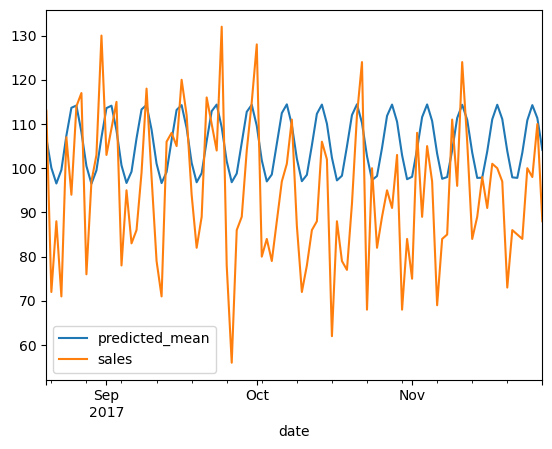

In [124]:
pred[:100].plot(legend=True)
new_test['sales'].iloc[:100].plot(legend=True)

In [125]:
new_test['sales'].mean()

84.742

In [126]:
rmse = sqrt(mean_squared_error(pred,new_test['sales']))
print(rmse)

27.1511774397868


In [127]:
model2 = ARIMA(new_df['sales'],order=(3,1,5))
model2 = model2.fit()

In [142]:
pred = model2.predict(start=len(new_df),end=len(new_df)+45000-1,type='levels').rename('Arima Prediction')

<Axes: >

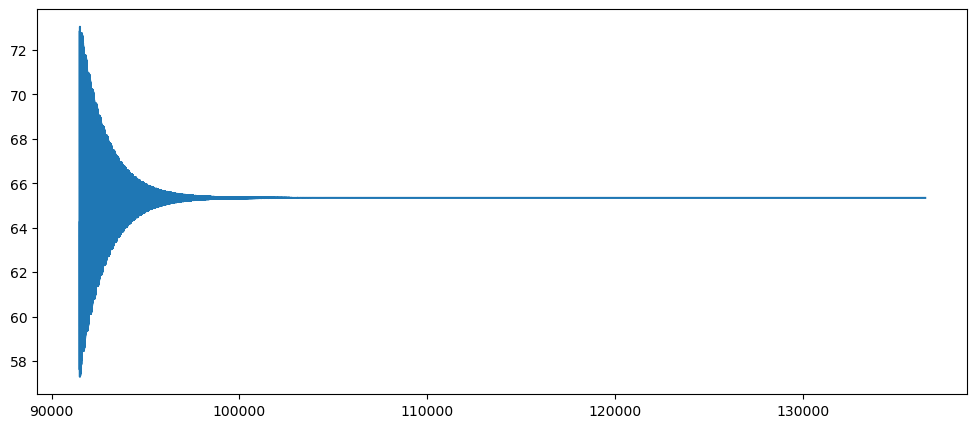

In [146]:
pred.plot(figsize=(12,5))

In [148]:
pred.values

array([64.24133315, 59.12987207, 57.61813115, ..., 65.34201351,
       65.34201351, 65.34201351])

In [150]:
submit['ARIMA_pred']=pred.values

In [151]:
submit

,id,sales,ARIMA_pred
0,0,69.356867,64.241333
1,1,69.146571,59.129872
2,2,72.384511,57.618131
3,3,74.655412,61.324028
4,4,74.542746,68.550441
...,...,...,...
44995,44995,59.126690,65.342014
44996,44996,59.126690,65.342014
44997,44997,59.126690,65.342014
44998,44998,59.126690,65.342014


<Axes: >

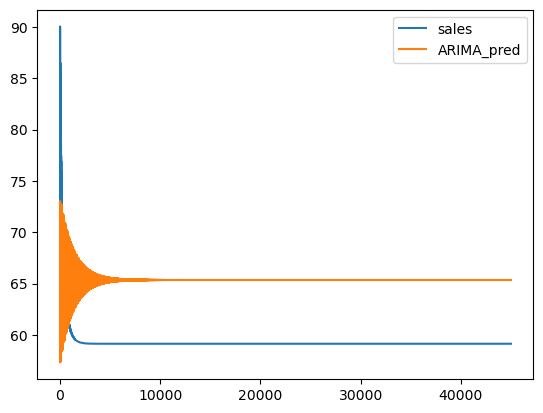

In [152]:
submit.sales.plot(legend=True)
submit.ARIMA_pred.plot(legend=True)